In [53]:
import requests # To make get calls to API
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup # Helps make parsing html files much easier
from functions import *
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# This token was granted through the use of Genius's website and allows us to make calls to the API
client_access_token = "_mDTViAvedsTbhpMuhLml-2gkMw1DU8tKQRnqmFkQDXT2aypVvCg67wDEr4eqBIs"

In [2]:
SPOTIPY_CLIENT_ID='19cb7472401c45c2acaa41ad01bb9e6d'
SPOTIPY_CLIENT_SECRET='7d3065a3086746f5bf7f94812e398230'

#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# RapCaviar Playlist (Import Playlist Here)
url = "https://open.spotify.com/playlist/37i9dQZF1DX0XUsuxWHRQd"
artists = []
results = sp.playlist_items(url)
for idx, item in enumerate(results['items']):
    track = item['track']
    artists.append(track['artists'][0]['name'])
#     print(idx, track['artists'][0]['name'], " - ", track['name'])
result = [] 
[result.append(x) for x in artists if x not in result] 
print(result)


['Jack Harlow', 'Lil Baby', 'Southside', 'Lil Durk', 'Hunxho', 'Pusha T', 'SleazyWorld Go', 'Lil Tjay', 'DaBaby', 'Gunna', 'Gucci Mane', 'Kodak Black', 'Fivio Foreign', 'Nardo Wick', 'Nigo', 'Key Glock', 'DDG', 'Juice WRLD', 'Jim Jones', 'Joyner Lucas', '42 Dugg', 'Mike Dimes', 'Future', 'YG', 'Megan Thee Stallion', 'BIA', 'Latto', 'Coi Leray', 'Takeoff', 'King Von', 'Tee Grizzley', 'Baby Keem', 'Kay Flock', 'Bas', 'Nicki Minaj', 'ScHoolboy Q', 'Yo Gotti', 'Yeat', 'Vince Staples', 'Dreamville', 'Tyler, The Creator', 'NLE Choppa']


In [3]:
all_songs = []
for artist_name in result:
    songs = request_song_url(artist_name, 10)
    lyrics = [""] * 10
    index = 0
    for song in songs:
        soup = BeautifulSoup(requests.get(song).content, 'lxml')
        lyrics[index] = ""

        for tag in soup.select('div[class^="Lyrics__Container"], .song_body-lyrics p'):

            for i in tag.select('i'):
                i.unwrap()
            tag.smooth()

            t = tag.get_text(strip=True, separator='\n')

            if t:
                lyrics[index]+=(t)
        print(index)
        index = index + 1
    search_term = artist_name
    genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"
    response = requests.get(genius_search_url)
    json_data = response.json()
    index = 0
    for song in json_data['response']['hits']:
        all_songs.append([search_term, song['result']['full_title'], lyrics[index]])
        index += 1

Found 10 songs by Jack Harlow
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Lil Baby
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Southside
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Lil Durk
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Hunxho
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Pusha T
0
1
2
3
4
5
6
7
8
9
Found 10 songs by SleazyWorld Go
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Lil Tjay
0
1
2
3
4
5
6
7
8
9
Found 10 songs by DaBaby
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Gunna
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Gucci Mane
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Kodak Black
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Fivio Foreign
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Nardo Wick
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Nigo
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Key Glock
0
1
2
3
4
5
6
7
8
9
Found 10 songs by DDG
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Juice WRLD
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Jim Jones
0
1
2
3
4
5
6
7
8
9
Found 10 songs by Joyner Lucas
0
1
2
3
4
5
6
7
8
9
Found 10 songs by 42 Dugg
0
1
2
3
4
5
6
7
8
9
F

In [4]:
song = pd.DataFrame(all_songs)
song.columns = ['artist_name', 'song_title', 'lyrics']
compression_opts = dict(method='zip',
                        archive_name='out.csv') 
song.to_csv('out.zip', index=False,
          compression=compression_opts)

In [38]:
data = pd.read_csv ('out.csv')
print("Artists in the data:\n",data.artist_name.value_counts()) 

Artists in the data:
 Jack Harlow            10
Baby Keem              10
YG                     10
Megan Thee Stallion    10
BIA                    10
Latto                  10
Coi Leray              10
Takeoff                10
King Von               10
Tee Grizzley           10
Kay Flock              10
Lil Baby               10
Bas                    10
Nicki Minaj            10
ScHoolboy Q            10
Yo Gotti               10
Yeat                   10
Vince Staples          10
Dreamville             10
Tyler, The Creator     10
Future                 10
Mike Dimes             10
42 Dugg                10
Joyner Lucas           10
Southside              10
Lil Durk               10
Pusha T                10
SleazyWorld Go         10
Lil Tjay               10
DaBaby                 10
Gunna                  10
Gucci Mane             10
Kodak Black            10
Fivio Foreign          10
Nardo Wick             10
Nigo                   10
Key Glock              10
DDG             

In [40]:
data["no_of_characters"] = data["lyrics"].apply(len)
data["no_of_words"]=data.apply(lambda row: nltk.word_tokenize(row["lyrics"]), axis=1).apply(len)
data["no_of_lines"] = data["lyrics"].str.split('\n').apply(len)
data.describe()

,no_of_characters,no_of_words,no_of_lines
count,418.000000,418.000000,418.000000
mean,3276.366029,823.325359,79.870813
std,1029.376094,263.070377,25.249120
min,922.000000,186.000000,30.000000
25%,2495.500000,637.750000,62.000000
50%,3179.000000,803.000000,76.000000
75%,3805.000000,968.500000,92.750000
max,9811.000000,2223.000000,240.000000


<Figure size 1080x1080 with 0 Axes>

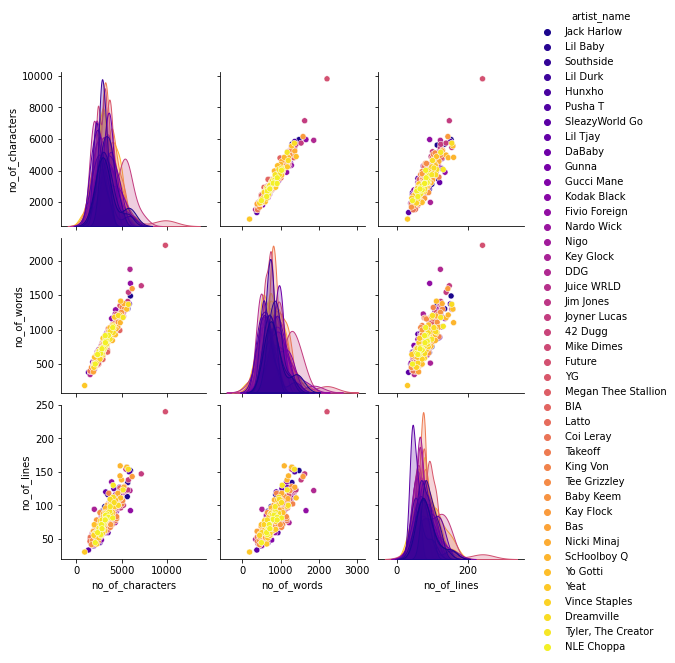

In [48]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="artist_name", palette="plasma")


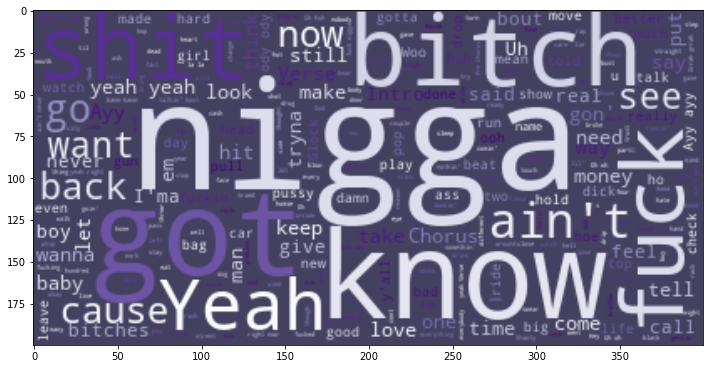

In [54]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()